In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from statsmodels.tsa.arima.model import ARIMA
import math

## Mounting Google Drive in a Google Colab notebook

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Excel file using Pandas from a specific path from Google Drive

In [3]:
df0 = pd.read_excel('/content/drive/MyDrive/Data/online_retail_II.xlsx')

In [4]:
#Second data was on sheet 1
df1 = pd.read_excel('/content/drive/MyDrive/Data/online_retail_II.xlsx', sheet_name=1)

In [5]:

#Concatenating two DataFrames
retail_data = pd.concat([df0, df1], ignore_index=True)

In [6]:
df=retail_data

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [10]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [11]:
df.shape

(1067371, 8)

In [12]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [13]:
for i in df.columns:
  print(i," ",df[i].unique())

Invoice   [489434 489435 489436 ... 581585 581586 581587]
StockCode   [85048 '79323P' '79323W' ... 23609 23617 23843]
Description   ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity   [    12     48     24 ...    698  80995 -80995]
InvoiceDate   <DatetimeArray>
['2009-12-01 07:45:00', '2009-12-01 07:46:00', '2009-12-01 09:06:00',
 '2009-12-01 09:08:00', '2009-12-01 09:24:00', '2009-12-01 09:28:00',
 '2009-12-01 09:43:00', '2009-12-01 09:44:00', '2009-12-01 09:46:00',
 '2009-12-01 09:50:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
 '2011-12-09 12:50:00']
Length: 47635, dtype: datetime64[ns]
Price   [   6.95    6.75    2.1  ...  933.17 1714.17  224.69]
Customer ID   [13085. 13078. 15362. ...

In [14]:
uniq_products = df['Description'].unique()

In [15]:
df['Description'].nunique()

5698

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [17]:
# let clean the string of the description to understand the names of the products easily
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()
df['Description'] = df['Description'].replace('\s+',' ',regex=True)

In [18]:
df['StockCode'].nunique()

5305

In [19]:
# Converting 'StockCode' column to uppercase and then to string type
df['StockCode'] = df['StockCode'].str.upper()
df['StockCode'] = df['StockCode'].astype(str)

In [20]:
df['StockCode'].isna().sum()

0

In [21]:
# finding the unusual StockCodes
Stock = df['StockCode'].unique()
Stock.sort()
unusual_codes = Stock[::-1][:]

print(' total unusual / Irrelevant stock codes are : ', len(unusual_codes))
print('Irrelevant stock codes: \n', unusual_codes)


 total unusual / Irrelevant stock codes are :  1543
Irrelevant stock codes: 
 ['nan' 'TEST002' 'TEST001' ... '10123G' '10123C' '10002R']


In [22]:
# Check if each StockCode contains at least one digit
CodeTypes = [any(char.isdigit() for char in code) for code in df['StockCode']]

In [23]:
if "False" in CodeTypes:
  print('there are irrevlevent stock codes')
else:
  print('there are no irrevlevent values')

there are no irrevlevent values


In [24]:
# Find the indices of StockCodes that contain only strings
Irrelevantstockindices = [i for i, v
 in enumerate(CodeTypes) if v == False]

In [25]:
len(Irrelevantstockindices)

937964

In [26]:
# REMOVING ROWS WITH IRRELEVANT STOCKCODES
df.drop(Irrelevantstockindices, inplace=True)

In [27]:
df.shape

(129407, 8)

In [133]:
# removing outlier from Price and Quantity column by using z-score method
data = df[(np.abs(sp.stats.zscore(df['Price'])) < 3) & (np.abs(sp.stats.zscore(df['Quantity'])) < 5)]

In [94]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067239,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
1067270,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
1067302,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
1067308,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


 **Data Cleaning**

In [134]:
filt = (data.Invoice.str.contains('C') == True)
data['Invoice'][filt]

179        C489449
185        C489449
196        C489459
197        C489459
198        C489459
            ...   
1062374    C581228
1062377    C581229
1062379    C581229
1063076    C581330
1064027    C581409
Name: Invoice, Length: 2178, dtype: object

In [135]:
unique_invoices = data['Invoice'].unique()

In [136]:
for item in unique_invoices:
  print(item)

Streaming output truncated to the last 5000 lines.
562150
562152
562156
562158
562161
562163
562166
562173
C562188
562199
562201
562203
562204
562205
562207
562210
562211
562214
562213
562216
562218
562219
562220
562222
562233
562258
562263
562264
562270
562272
562273
562274
562276
562277
C562280
C562281
562282
562283
562284
562285
562313
562339
562340
562342
562341
562346
562345
562347
562348
562351
562354
562353
562365
562369
562371
562376
562377
562378
562379
562381
562385
562386
562387
562388
562392
562393
562417
562419
562420
562421
562422
562427
562428
562429
562432
562433
562437
562444
562445
562449
562452
562453
562454
562455
562456
562459
562460
562462
562465
562490
562516
562517
562519
562521
562524
562528
562530
562531
562534
562535
562537
562538
562540
562542
562543
562549
562551
562553
562558
562560
562562
562565
562567
562569
562572
562571
562573
562574
562575
562576
562579
562580
562583
562584
562587
562590
562591
562593
562592
C562594
562595
562596
562598
562602
562604


In [137]:
if (data['Quantity'] < 0).any():
    print("Column 'quantity' has negative values.")
else:
    print("Column 'Quantity' does not have negative values")

Column 'quantity' has negative values.


In [138]:
# Drop rows where Invoice number is positive and contains 'C'
filt = (data.Invoice.str.contains('C') == True)
data.drop(data[filt].index, inplace=True)

<ipython-input-138-716db9cef8cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt].index, inplace=True)


In [139]:
data['Invoice'] = data['Invoice'].astype(str)

<ipython-input-139-84c7f6ed0c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Invoice'] = data['Invoice'].astype(str)


In [140]:
# drop  INCORRECT VALUES

# Drop rows where Quantity is positive and Invoice contains 'C'
filt1 = (data.Quantity > 0) & (data.Invoice.str.contains('C') == True)
data.drop(data[filt1].index, inplace=True)

# Drop rows where Quantity is negative and Invoice does not contain 'C'
filt2 = (data.Quantity < 0) & (data.Invoice.str.contains('C') == False)
data.drop(data[filt].index, inplace=True)


<ipython-input-140-3145b1f18f54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt1].index, inplace=True)
<ipython-input-140-3145b1f18f54>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[filt].index, inplace=True)
<ipython-input-140-3145b1f18f54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt].index, inplace=True)


In [141]:
data.head(50)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,2009-12-01 09:08:00,2.55,15362.0,United Kingdom
46,489437,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2009-12-01 09:08:00,0.85,15362.0,United Kingdom
61,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom
62,489438,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom


In [142]:
# Drop rows where Description contains '?'
data.drop(data[data.Description.str.contains('?', regex=False) == True].index, inplace=True)

<ipython-input-142-be1803a0e51a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.Description.str.contains('?', regex=False) == True].index, inplace=True)


In [143]:
# Drop rows where Price is equal to 0
data.drop(data[data.Price == 0].index, inplace=True)

<ipython-input-143-54aab8415913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.Price == 0].index, inplace=True)


In [144]:
# Fill missing Description values based on StockCode
for index, value in data.StockCode[data.Description.isna() == True].items():
    if pd.notna(data.Description[data.StockCode == value]).sum() != 0:
        data.Description[index] = data.Description[data.StockCode == value].mode()[0]
    else:
        data.drop(index=index, inplace=True)

In [145]:
# Convert 'Description' column to string type
data['Description'] = data['Description'].astype(str)

<ipython-input-145-384809b56a0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].astype(str)


In [146]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067239,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
1067270,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
1067302,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
1067308,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [147]:
#Checking if there is any remaining null value in Data 'Quantity' column
data[data['Quantity'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [148]:
#Checking if Quantity is less than 0
filt = (data['Quantity']<0)
data.loc[filt]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [149]:
# Make all quantity values non-negative by taking absolute values because they seems like useful not outliers
data['Quantity'] = data['Quantity'].abs()

<ipython-input-149-5b121cb8ebf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity'] = data['Quantity'].abs()


In [150]:
#Checking unique Countries in Data
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Poland', 'Channel Islands', 'Netherlands', 'Spain',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'United Arab Emirates',
       'Finland', 'Denmark', 'Italy', 'Switzerland', 'Belgium',
       'Unspecified', 'USA', 'Japan', 'Malta', 'Bahrain', 'RSA', 'Sweden',
       'Bermuda', 'Hong Kong', 'Singapore', 'Thailand', 'Israel',
       'Lithuania', 'Nigeria', 'West Indies', 'Korea', 'Brazil', 'Canada',
       'Iceland', 'Lebanon', 'Czech Republic', 'European Community'],
      dtype=object)

In [151]:
data['Country'].nunique()

42

In [152]:
# Selecting top 10 Products

# Group by 'StockCode' and sum the quantities
product_quantities = data.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort products by quantity in descending order
sorted_products = product_quantities.sort_values(by='Quantity', ascending=False)

# Print top 10 products by quantity
print(sorted_products.head(10))

    StockCode  Quantity
899    85099B     89068
908    85123A     81646
901    85099F     33837
900    85099C     30766
815    84970S     27231
814    84970L     17884
495    82494L     16069
21     16156S     14561
26     16161P     12526
438    75049L     11393


Let import holidays data becasue most of the sales and demands of products are on holidays so we need to add holidays as well on the dataset

In [153]:
import holidays
# countries corresponding codes
countries_and_codes = {
    'UNITED KINGDOM': 'GB',
    'USA': 'US'
}

holiday_data = []

# Get holidays for each country between 2009 and 2011
for country, country_code in countries_and_codes.items():
    try:
        # Get holidays for the specified country and years 2009, 2010, and 2011
        country_holidays = holidays.CountryHoliday(country_code, years=[2009, 2010, 2011])

        # Append holiday data to the list
        for date, name in sorted(country_holidays.items()):
            holiday_data.append({'date': date, 'holiday': name})
    except:
        print(f'Could not fetch holidays for {country}')

holiday_df = pd.DataFrame(holiday_data)

# Define start and end dates
start_date = '2009-12-01'
end_date = '2011-12-09'

# Convert 'date' column to datetime
holiday_df['date'] = pd.to_datetime(holiday_df['date'])

# Filter DataFrame based on date range
filtered_df = holiday_df[holiday_df['date'].between(start_date, end_date)]

# Drop duplicate rows based on 'date' and 'holiday'
filtered_df_no_duplicates = filtered_df.drop_duplicates(subset=['date', 'holiday'])

In [ ]:
filtered_df_no_duplicates

In [155]:
# Extract days from 'InvoiceDate'
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.dayofyear
data['weekday'] = data['InvoiceDate'].dt.weekday

<ipython-input-155-6c057f0fa7ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['InvoiceDate'].dt.month
<ipython-input-155-6c057f0fa7ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['InvoiceDate'].dt.dayofyear
<ipython-input-155-6c057f0fa7ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [157]:
data['InvoiceDate'].dtype

dtype('<M8[ns]')

In [158]:
# Merge the dataframes
data = pd.merge(data, filtered_df_no_duplicates, how='left', left_on=data['InvoiceDate'].dt.date, right_on=filtered_df_no_duplicates['date'].dt.date)

# List of unique holidays
unique_holidays = filtered_df_no_duplicates['holiday'].unique()

# Create columns for each holiday, fill with 1 if the holiday is observed, else fill with 0
for holiday in unique_holidays:
    data[holiday] = data['holiday'].apply(lambda x: 1 if x == holiday else 0)

# Drop redundant columns
data.drop(['date', 'holiday'], axis=1, inplace=True)

In [159]:
data

,key_0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month,...,Wedding of William and Catherine,Martin Luther King Jr. Day,Washington's Birthday,Memorial Day,Independence Day,Independence Day (observed),Labor Day,Columbus Day,Veterans Day,Thanksgiving
0,2009-12-01,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,...,0,0,0,0,0,0,0,0,0,0
1,2009-12-01,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,...,0,0,0,0,0,0,0,0,0,0
2,2009-12-01,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,12,...,0,0,0,0,0,0,0,0,0,0
3,2009-12-01,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom,12,...,0,0,0,0,0,0,0,0,0,0
4,2009-12-01,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124050,2011-12-09,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany,12,...,0,0,0,0,0,0,0,0,0,0
124051,2011-12-09,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom,12,...,0,0,0,0,0,0,0,0,0,0
124052,2011-12-09,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom,12,...,0,0,0,0,0,0,0,0,0,0
124053,2011-12-09,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom,12,...,0,0,0,0,0,0,0,0,0,0


**Modeling**

In [160]:
# Selecting the Top 10 Products to train them in the models

stock_codes = ['85099B', '85123A', '85099F', '85099C', '84970S', '84970L', '82494L', '16156S', '16161P', '84997D']


In [161]:
stock_dataframes = {}

In [2]:
from datetime import datetime, timedelta
for stock_code in stock_codes:
    # Extract data for the current stock code
    product_data = data[data['StockCode'] == stock_code]

    # Handle missing data if needed (example: drop NaN values)
    product_data = product_data.dropna()

    # Check if the DataFrame is not empty
    if not product_data.empty:
        # Set 'InvoiceDate' as the index
        product_data.set_index('InvoiceDate', inplace=True)

        product_daily = product_data.resample('D').sum()

        # Store the results in the dictionary
        stock_dataframes[stock_code] = product_daily

In [51]:
stock_dataframes

{'85099B':                                                        Invoice  \
 InvoiceDate                                                      
 2009-12-01   4894464895054895364895474895574895624895984895...   
 2009-12-02   4896754896994897024897864897974898004898324898...   
 2009-12-03   4899044899124899144900024900094900124900144900...   
 2009-12-04   4901664902024902094902294902474902874902984903...   
 2009-12-05                                        490390490393   
 ...                                                        ...   
 2011-12-05                      580595580643580653580675580722   
 2011-12-06   5807345807355807535808795808845808845809045809...   
 2011-12-07                581014581027581113581122581167581196   
 2011-12-08                581216581222581401581403581412581421   
 2011-12-09                                              581486   
 
                                                      StockCode  \
 InvoiceDate                                      

In [ ]:
# for stock_code, stock_dataframe in stock_dataframes.items():
#     stock_dataframe.to_csv(f"/content/drive/MyDrive/Data/Top 10 products data/{stock_code}_data.csv", index=True)

In [164]:
# p1 = pd.DataFrame(stock_dataframes['85123A'])

In [9]:
p1 = pd.read_csv('/content/drive/MyDrive/Data/Top 10 products data/85123A_data.csv')

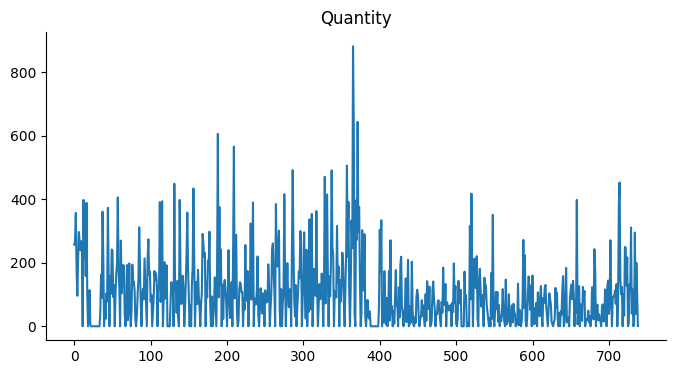

In [166]:
#plot quantity column
p1['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

**Modeling**

In [167]:
# split data into test and training
total_length = len(p1)
train_size = int(0.80 * total_length)

train_data = p1.iloc[:train_size]
test_data = p1.iloc[train_size:]

LSTM model

In [168]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [169]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data['Quantity'].values.reshape(-1,1))

In [170]:
# Prepare the data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
X_train, y_train = create_dataset(train_scaled, train_scaled, TIME_STEPS)

In [171]:
X_train.shape

(581, 10, 1)

In [172]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [173]:
# Fit the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/100
17/17 [==============================] - 4s 51ms/step - loss: 0.0255 - val_loss: 0.0106
Epoch 2/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0176 - val_loss: 0.0080
Epoch 3/100
17/17 [==============================] - 0s 25ms/step - loss: 0.0176 - val_loss: 0.0081
Epoch 4/100
17/17 [==============================] - 0s 25ms/step - loss: 0.0174 - val_loss: 0.0079
Epoch 5/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0174 - val_loss: 0.0078
Epoch 6/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0174 - val_loss: 0.0077
Epoch 7/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0173 - val_loss: 0.0076
Epoch 8/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0173 - val_loss: 0.0075
Epoch 9/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0173 - val_loss: 0.0075
Epoch 10/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0173 - val_loss: 0.0074

In [174]:
# make prediction on testing data
test_scaled = scaler.transform(test_data['Quantity'].values.reshape(-1,1))
X_test, y_test = create_dataset(test_scaled, test_scaled, TIME_STEPS)

predictions = model.predict(X_test)

# Invert scaling for predictions and actual
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 [==============================] - 0s 4ms/step


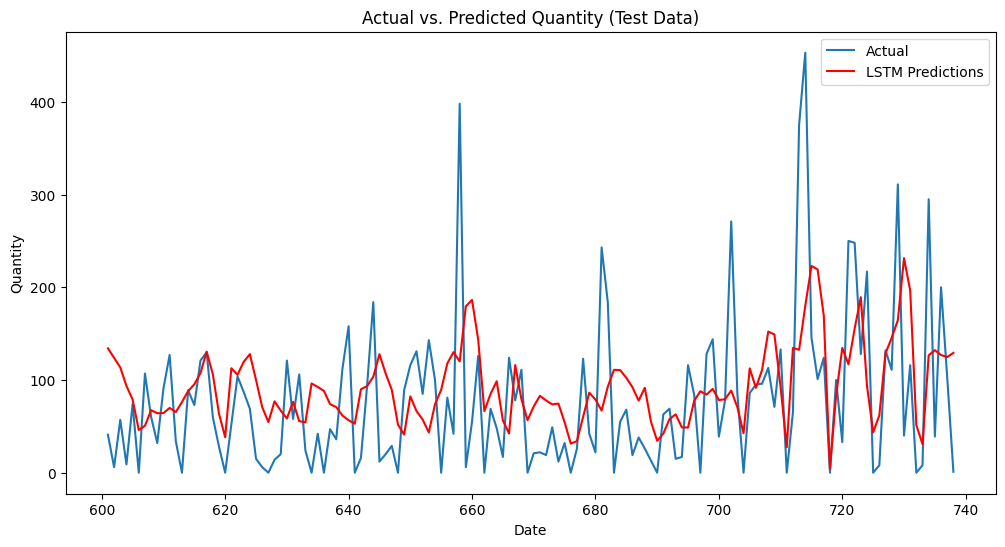

In [175]:
# Plot the actual vs. predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[TIME_STEPS:], actual, label='Actual')
plt.plot(test_data.index[TIME_STEPS:], predictions, color='red', label='LSTM Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


ARIMA model

In [177]:
p1['Quantity']

0      257
1      267
2      357
3      179
4       96
      ... 
734    295
735     39
736    200
737    103
738      1
Name: Quantity, Length: 739, dtype: int64

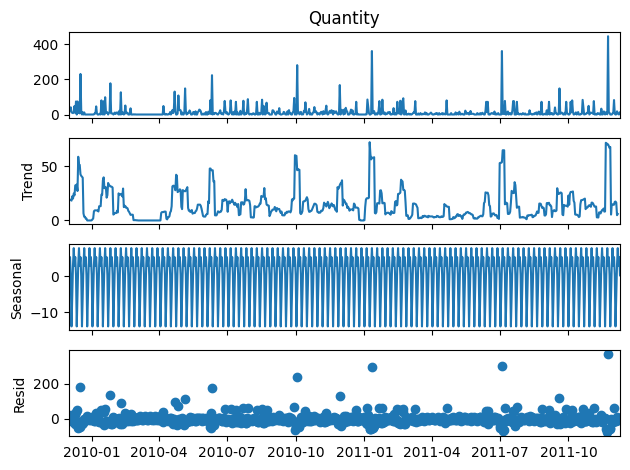

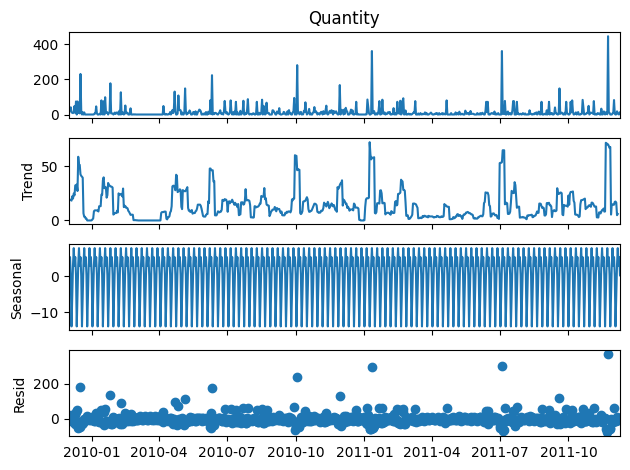

In [179]:
# lets check the trend and seasonality graph
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = product_daily['Quantity'].copy()

decompose_result_add = seasonal_decompose(analysis, model="additive")

trend = decompose_result_add.trend
seasonal = decompose_result_add.seasonal
residual = decompose_result_add.resid

decompose_result_add.plot()

In [180]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

    # Check whether the data is statioanry or non-stationary
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against the null hypothesis which indicating data is non-stationary")

With the help of ADfuller you can see that our data is already stationary so we don't need to do differencing for make it statiionary

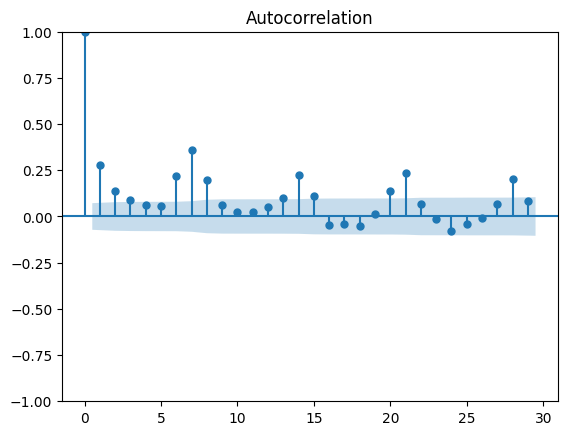

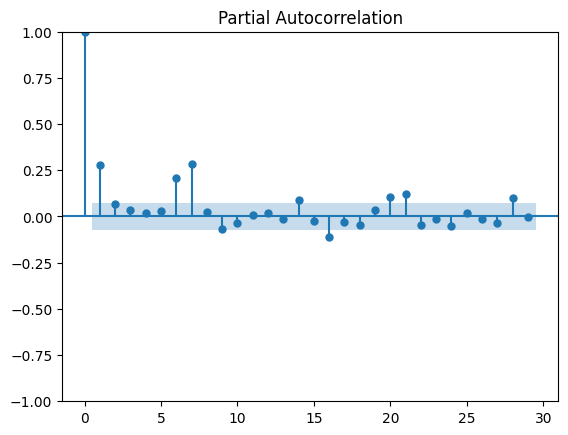

In [181]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#AutoCorrelation and Partial Correlation Plots
acf12 = plot_acf(p1["Quantity"].dropna())
pacf12 = plot_pacf(p1["Quantity"].dropna())

In [182]:
from statsmodels.tsa.arima.model import ARIMA

order = (5,1,0)
model = ARIMA(train_data['Quantity'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  591
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3629.760
Date:                Sun, 07 Apr 2024   AIC                           7271.520
Time:                        00:23:36   BIC                           7297.801
Sample:                             0   HQIC                          7281.758
                                - 591                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6433      0.034    -19.176      0.000      -0.709      -0.578
ar.L2         -0.5195      0.036    -14.339      0.000      -0.591      -0.448
ar.L3         -0.4288      0.041    -10.352      0.0

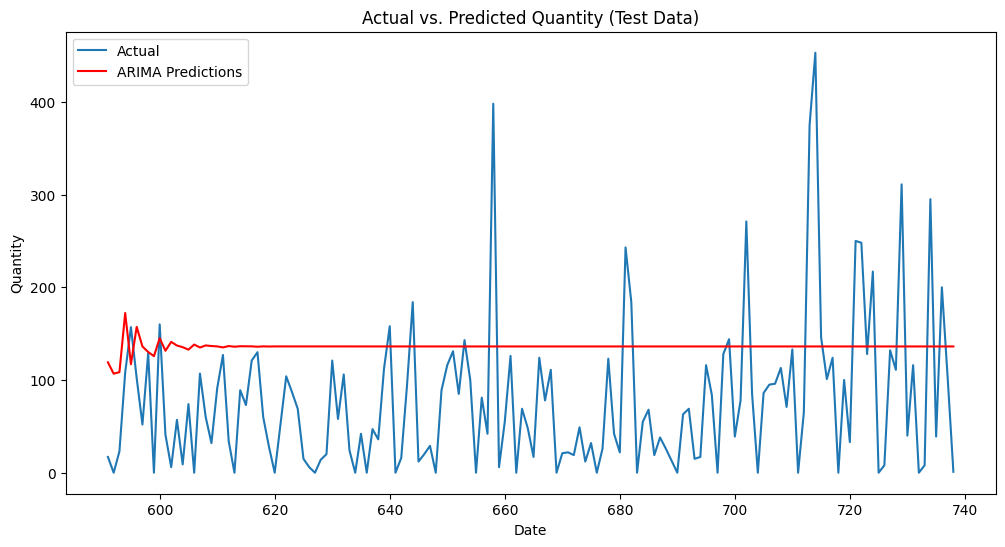

In [183]:
# Plot the actual vs. predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Quantity'], label='Actual')
plt.plot(test_data.index, model_fit.forecast(steps=len(test_data)), color='red', label='ARIMA Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

SARIMAX model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX model
model_SARIMA = SARIMAX(endog=train_data['Quantity'],
                       order=(2, 1, 3),
                       seasonal_order=(1, 1, 1, 12)
                      )
model_SARIMA_fit = model_SARIMA.fit()

model_SARIMA_fit.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Quantity   No. Observations:                  591
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -3594.833
Date:                              Wed, 03 Apr 2024   AIC                           7205.667
Time:                                      02:20:58   BIC                           7240.543
Sample:                                  12-01-2009   HQIC                          7219.266
                                       - 07-14-2011                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2466      0.002    551.374      0.000       1.242       1.251
ar.L2         -0.9997      0.001  -1003.125      0.000      -1.002      -0.998
ma.L1         -2.1890      0.179    -12.263      0.000      -2.539      -1.839
ma.L2          2.1771      0.452      4.820      0.000       1.292       3.062
ma.L3         -0.9511      0.269     -3.539      0.000      -1.478      -0.424
ar.S.L12       0.2418      0.085      2.830      0.005       0.074       0.409
ma.S.L12      -0.9930      0.374     -2.655      0.008      -1.726      -0.260
sigma2      2.026e+04   8842.767      2.291      0.022    2929.916    3.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   8.59   Jarque-Bera (JB):               652.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Set the start and end dates for predictions
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

# Print the start and end dates
print(pred_start_date)
print(pred_end_date)

2011-07-15 00:00:00
2011-12-09 00:00:00


In [ ]:
from datetime import datetime, timedelta

# Set the start and end dates for predictions manually
pred_start_date = datetime(2011, 7, 15)
pred_end_date = datetime(2011, 12, 9)

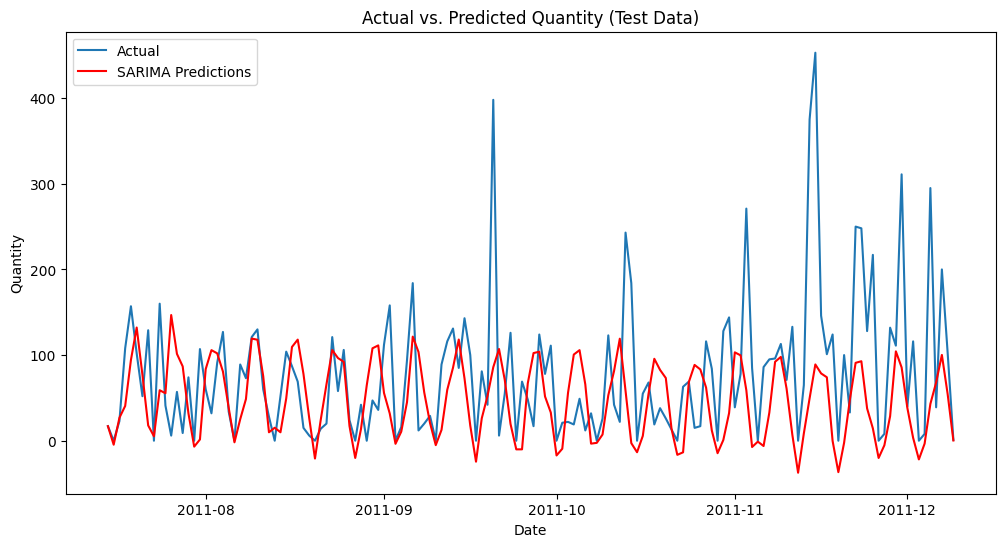

In [ ]:
df_forecast = pd.DataFrame()
df_forecast['forecast'] = model_SARIMA_fit.predict(start=pred_start_date, end=pred_end_date,
                                                   dynamic=True)

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Quantity'], label='Actual')
plt.plot(test_data.index, df_forecast['forecast'], color='red', label='SARIMA Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# **DARTS library Models**

In [10]:
#Importing Dart Library
# !pip install darts

from darts.models import TCNModel,  NBEATSModel, BlockRNNModel, TiDEModel
from darts.metrics import mape, r2_score
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
p1

,InvoiceDate,Quantity,Price,Customer ID,month,day,weekday,Christmas Day,Boxing Day,Boxing Day (observed),...,Wedding of William and Catherine,Martin Luther King Jr. Day,Washington's Birthday,Memorial Day,Independence Day,Independence Day (observed),Labor Day,Columbus Day,Veterans Day,Thanksgiving
0,2009-12-01,257,45.20,240163.0,192,5360,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009-12-02,267,43.05,231722.0,180,5040,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009-12-03,357,60.75,318920.0,252,7077,63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009-12-04,179,37.95,196742.0,156,4394,52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009-12-05,96,16.10,101507.0,72,2034,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2011-12-05,295,37.04,177857.0,144,4068,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
735,2011-12-06,39,11.80,57762.0,48,1360,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,2011-12-07,200,31.25,172452.0,132,3751,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
737,2011-12-08,103,31.65,174924.0,132,3762,33,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
p1.drop(['Price','Customer ID'],axis=1,inplace=True)

In [13]:
# converting dataframe into timeseries
from darts import TimeSeries
p1_timeseries = TimeSeries.from_dataframe(p1, value_cols='Quantity')
p1_timeseries_temp = TimeSeries.from_dataframe(p1, value_cols=p1.columns[1:])

In [14]:
# scale data for training
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()

scaler_ts = scaler.fit_transform(p1_timeseries)
scaler_ts_temp = scaler.fit_transform(p1_timeseries_temp)

In [15]:
# Split the data into training and testing sets
train_data , test_data = scaler_ts[:-36] , scaler_ts[-36:]

In [52]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=10, n_epochs=50, random_state=0, activation='ReLU')

In [53]:
model.fit(train_data, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.786    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=10, n_epochs=50, random_state=0)

In [71]:
pred = model.predict(n=36, series=train_data)

In [32]:
actual = test_data[-36:].values().reshape(-1, 1)
predicted = pred.values().reshape(-1, 1)

In [33]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print('Metrics : ')
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))

Metrics : 
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


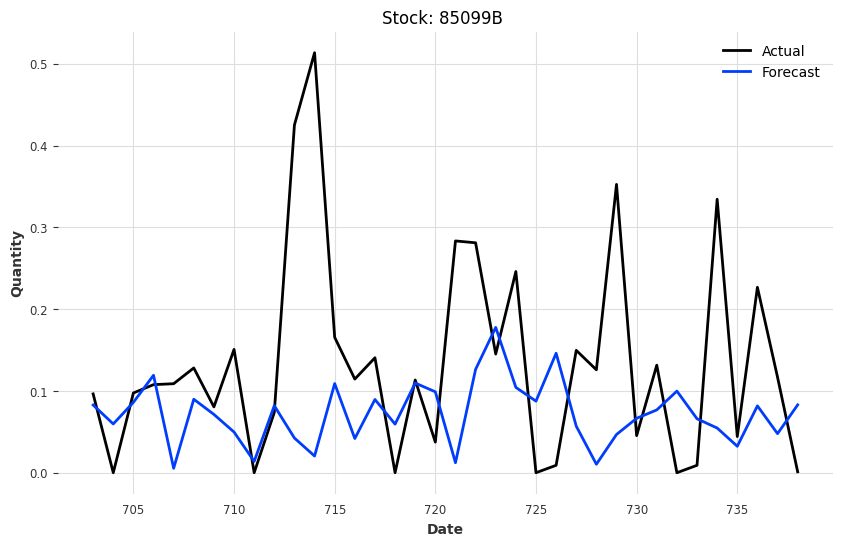

In [34]:
# Visualize actual vs. predicted time series data
plt.figure(figsize=(10, 6))
test_data[-36:].plot(label='Actual')
pred.plot(label='Forecast')
plt.title ("Stock: 85099B ")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

**BlockRNN_test Model**

In [35]:
model2 = BlockRNNModel(model="LSTM", input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=0, model_name='BlockRNN_test', save_checkpoints=True, force_reset=True)

In [36]:
model2.fit(train_data, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 312   
---------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


BlockRNNModel(output_chunk_shift=0, model=LSTM, hidden_dim=25, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.0, input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=0, model_name=BlockRNN_test, save_checkpoints=True, force_reset=True)

In [37]:
pred = model2.predict(n=36, series=train_data)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [38]:
actual = test_data[-36:].values().reshape(-1, 1)
predicted = pred.values().reshape(-1, 1)

In [39]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print('Metrics : ')
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))

Metrics : 
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


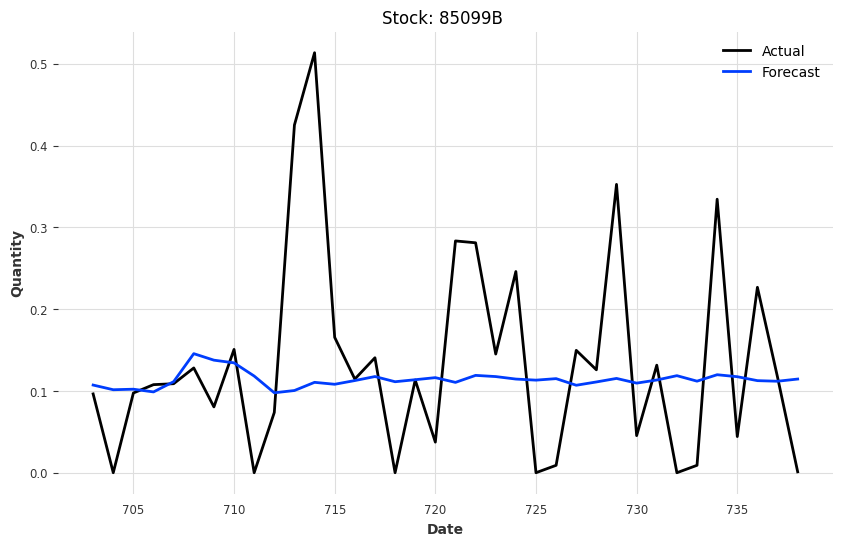

In [40]:
# Visualize actual vs. predicted time series data
plt.figure(figsize=(10, 6))
test_data[-36:].plot(label='Actual')
pred.plot(label='Forecast')
plt.title ("Stock: 85099B ")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

**TiDEModel**

In [41]:
model3 = TiDEModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50)

In [42]:
model3.fit(train_data, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type             | Params
------------------------------------------------------
0 | criterion        | MSELoss          | 0     
1 | train_metrics    | MetricCollection | 0     
2 | val_metrics      | MetricCollection | 0     
3 | encoders         | Sequential       | 22.9 K
4 | decoders         | Sequential       | 66.0 K
5 | temporal_decoder | _ResidualBlock   | 594   
6 | lookback_skip    | Linear           | 300   
------------------------------------------------------
89.9 K    Trainable params
0         Non-trainable params
89.9 K    Total params
0.359     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


TiDEModel(output_chunk_shift=0, num_encoder_layers=1, num_decoder_layers=1, decoder_output_dim=16, hidden_size=128, temporal_width_past=4, temporal_width_future=4, temporal_decoder_hidden=32, use_layer_norm=False, dropout=0.1, use_static_covariates=True, input_chunk_length=24, output_chunk_length=12, n_epochs=50)

In [43]:
pred = model3.predict(n=36, series=train_data)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [44]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print('Metrics : ')
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))

Metrics : 
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


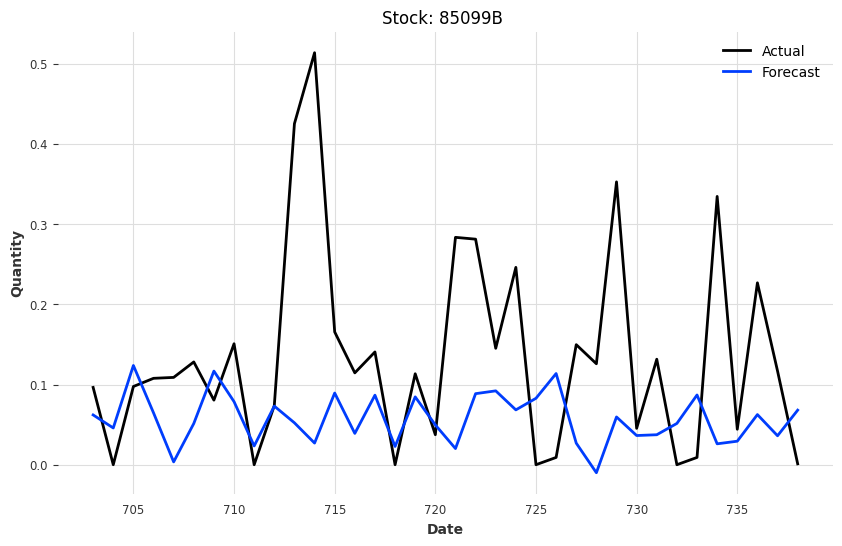

In [45]:
# Visualize actual vs. predicted time series data
plt.figure(figsize=(10, 6))
test_data[-36:].plot(label='Actual')
pred.plot(label='Forecast')
plt.title ("Stock: 85099B ")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

**TCN_model**

In [46]:
model4 = TCNModel(
            input_chunk_length=24,
            output_chunk_length=12,
            n_epochs=200,
            dropout=0.1,
            dilation_base=2,
            weight_norm=True,
            kernel_size=5,
            num_filters=3,
            random_state=0,
            save_checkpoints=True,
            force_reset=True,
        )

In [47]:
model4.fit(train_data, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 150

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


TCNModel(output_chunk_shift=0, kernel_size=5, num_filters=3, num_layers=None, dilation_base=2, weight_norm=True, dropout=0.1, input_chunk_length=24, output_chunk_length=12, n_epochs=200, random_state=0, save_checkpoints=True, force_reset=True)

In [48]:
pred = model4.predict(n=36, series=train_data)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [49]:
predicted

array([[0.1072096 ],
       [0.10148724],
       [0.10213066],
       [0.09881427],
       [0.11134502],
       [0.14559745],
       [0.13764671],
       [0.13435642],
       [0.1182344 ],
       [0.09776105],
       [0.10052628],
       [0.11053081],
       [0.1081629 ],
       [0.11270417],
       [0.11760877],
       [0.11127398],
       [0.11374382],
       [0.11626815],
       [0.11047758],
       [0.11903794],
       [0.11757864],
       [0.11453826],
       [0.11321478],
       [0.11505552],
       [0.10696736],
       [0.11099659],
       [0.11531304],
       [0.10957148],
       [0.11337535],
       [0.11868329],
       [0.1119713 ],
       [0.11983088],
       [0.11741346],
       [0.11259831],
       [0.11186821],
       [0.11454835]])

In [50]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print('Metrics : ')
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))

Metrics : 
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


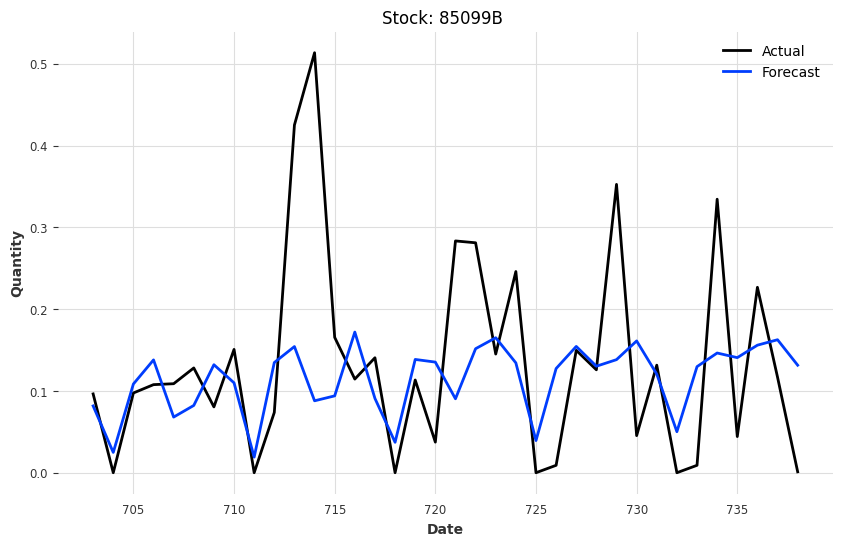

In [51]:
# Visualize actual vs. predicted time series data
plt.figure(figsize=(10, 6))
test_data[-36:].plot(label='Actual')
pred.plot(label='Forecast')
plt.title ("Stock: 85099B ")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()